In [1]:
import tensorflow_datasets as tfds

In [2]:
# Load the cats_vs_dogs dataset
datasets, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, 

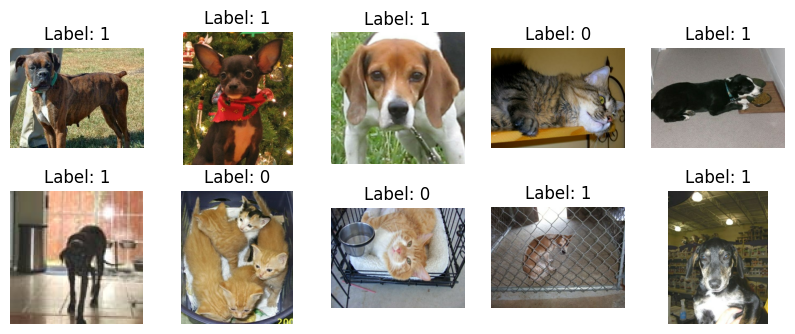

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Take a peek at the first few examples from the dataset
train_data = datasets['train']
plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(train_data.take(10)):
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()


In [5]:
#
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import shutil
import random
import matplotlib.pyplot as plt

# Load the dataset
datasets, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

# Create directories for train and test splits
train_dir = 'data/train'
test_dir = 'data/test'

os.makedirs(train_dir + '/cats', exist_ok=True)
os.makedirs(train_dir + '/dogs', exist_ok=True)
os.makedirs(test_dir + '/cats', exist_ok=True)
os.makedirs(test_dir + '/dogs', exist_ok=True)

# Split ratio for training and testing (70% train, 30% test)
split_ratio = 0.7

# Initialize lists for cats and dogs
cats = []
dogs = []

# Iterate through the dataset and categorize images
for image, label in tfds.as_numpy(datasets['train']):

    # Convert image to numpy array for saving later
    image_np = image

    # 0: Cat, 1: Dog
    if label == 0:
        cats.append(image_np)
    else:
        dogs.append(image_np)

# Shuffle the data
random.shuffle(cats)
random.shuffle(dogs)

# Define the split point for train/test split
split_cats = int(len(cats) * split_ratio)
split_dogs = int(len(dogs) * split_ratio)

train_cats = cats[:split_cats]
test_cats = cats[split_cats:]

train_dogs = dogs[:split_dogs]
test_dogs = dogs[split_dogs:]

# Function to save images to the directory
def save_images(images, directory, prefix):
    for i, img in enumerate(images):
        img_path = os.path.join(directory, f"{prefix}_{i}.jpg")
        plt.imsave(img_path, img)

# Save the training and testing data
save_images(train_cats, train_dir + '/cats', 'cat')
save_images(test_cats, test_dir + '/cats', 'cat')

save_images(train_dogs, train_dir + '/dogs', 'dog')
save_images(test_dogs, test_dir + '/dogs', 'dog')

print("Dataset split and saved successfully!")



Dataset split and saved successfully!


In [6]:
# ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    shear_range=0.2,           # Randomly shear images
    width_shift_range=0.2,     # Randomly shift images horizontally
    height_shift_range=0.2,    # Randomly shift images vertically
    zoom_range=0.2,            # Randomly zoom images
    horizontal_flip=True,      # Randomly flip images horizontally
    rotation_range=40,         # Randomly rotate images
    fill_mode='nearest',       # Fill mode for image augmentation
    validation_split=0.3       # Use 30% of the data for validation
)

# Load the training dataset
train_generator = train_datagen.flow_from_directory(
    'data/train',               # Path to your train directory
    target_size=(150, 150),      # Resize images to 150x150
    batch_size=10,               # Batch size
    class_mode='categorical',    # Use 'categorical' for multi-class classification
    subset='training'            # Subset for training data (70%)
)

# Load the validation dataset
validation_generator = train_datagen.flow_from_directory(
    'data/train',               # Same directory
    target_size=(150, 150),      # Resize images to 150x150
    batch_size=10,               # Batch size
    class_mode='categorical',    # Use 'categorical' for multi-class classification
    subset='validation'          # Subset for validation data (30%)
)

Found 11398 images belonging to 2 classes.
Found 4884 images belonging to 2 classes.


In [7]:
# Print number of samples and batches for verification
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Batch size: {train_generator.batch_size}")




Number of training samples: 11398
Number of validation samples: 4884
Batch size: 10


In [8]:
#
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model():
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fourth convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fifth convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flattening the output from convolutional layers
    model.add(layers.Flatten())

    # Fully connected layer
    model.add(layers.Dense(512, activation='relu'))

    # Output layer with 2 neurons (for categorical classification: cat or dog)
    model.add(layers.Dense(2, activation='softmax'))  # Softmax for categorical classification

    return model

# Create the model
model = create_cnn_model()

# Compile the model with categorical crossentropy and SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',  # Categorical crossentropy for categorical classification
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,578 (986.63 KB)

 Trainable params: 252,578 (986.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10                    # Train for 10 epochs
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1139/1139 ━━━━━━━━━━━━━━━━━━━━ 715s 626ms/step - accuracy: 0.5119 - loss: 0.6953 - val_accuracy: 0.5025 - val_loss: 0.6920
Epoch 2/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 1s 218us/step - accuracy: 0.3000 - loss: 0.7016 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1139/1139 ━━━━━━━━━━━━━━━━━━━━ 706s 619ms/step - accuracy: 0.5081 - loss: 0.6944 - val_accuracy: 0.5012 - val_loss: 0.6975
Epoch 4/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 1s 98us/step - accuracy: 0.6000 - loss: 0.6654 - val_accuracy: 0.5000 - val_loss: 0.6738
Epoch 5/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 732s 611ms/step - accuracy: 0.5401 - loss: 0.6883 - val_accuracy: 0.5012 - val_loss: 0.7187
Epoch 6/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 1s 112us/step - accuracy: 0.4000 - loss: 0.7655 - val_accuracy: 0.5000 - val_loss: 0.7180
Epoch 7/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 683s 599ms/step - accuracy: 0.5395 - loss: 0.6883 - val_accuracy: 0.6027 - val_loss: 0.6645
Epoch 8/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 1s 104us/step - accuracy: 0.6000 - loss: 0.6212 - val_accuracy: 0.7500 - val_loss: 0.7025
Epoch 9/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 691s 606ms/step - accuracy: 0.6024 - loss: 0.6610 - val_accuracy: 0.6254 - val_loss: 0.6522
Epoch 10/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 1s 96us/step - accuracy: 0.3000 - los

In [10]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)


Found 6980 images belonging to 2 classes.


In [13]:
import os
print(os.getcwd())


/content


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to visualize predictions
def visualize_predictions(test_generator, model, num_examples=10):
    plt.figure(figsize=(10, 10))

    # Create a batch of images and labels
    images, labels = next(test_generator)

    for i in range(min(num_examples, len(images))):
        img_array = images[i]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction[0])

        # Map index to class name
        class_names = test_generator.class_indices
        class_names = {v: k for k, v in class_names.items()}
        predicted_class_name = class_names[predicted_class_index]
        true_class_name = class_names[np.argmax(labels[i])]

        # Plot the image and prediction
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].astype("uint8"))  # Ensure image is in uint8 format
        plt.title(f"Pred: {predicted_class_name}\nTrue: {true_class_name}")
        plt.axis('off')

    plt.show()




Found 6980 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


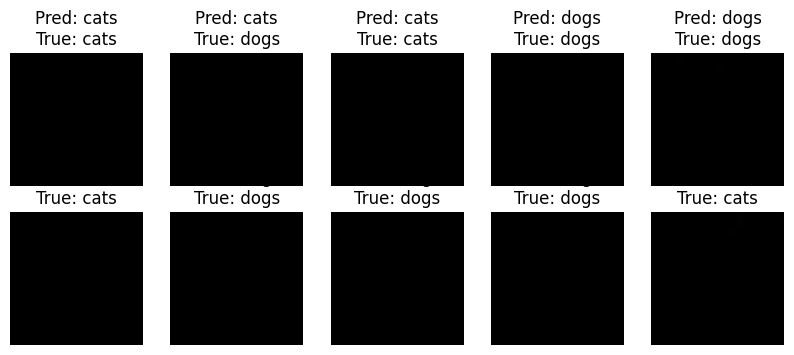

In [26]:
#
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

visualize_predictions(test_generator, model)
